# Simulations in one-dimensional heterogeneous atmospheres

This tutorial illustrates how to perform monochromatic simulations in one-dimensional heterogeneous atmospheres using the one-dimensional solver application [OneDimSolverApp](../../../rst/api_reference/generated/eradiate.solvers.onedim.app.OneDimSolverApp.rst).
Refer to the one-dimensional solver application tutorial (provide links) if needed.

<div class="alert alert-info">

This tutorial requires that you download the absorption cross section datasets.
Refer to the [data guide](../../../rst/user_guide/data_guide.rst) for instructions to download these datasets.

</div>

In [1]:
from eradiate.solvers.onedim.app import OneDimSolverApp

## Get started

In [ ]:
In order to focus on the parameters related to the heterogeneous atmosphere, we do not specify the surface and illumination configuration sections.
The `OneDimScene` that `OneDimSolverApp` builts, will use defaults to define these elements:
    
- The default surface is a `LambertianSurface` with a reflectance value of 0.5.
- The default illumination is a `DirectionalIllumination` (0 degree zenith and azimuth angles) with an irradiance value corresponding to the solar irradiance spectrum (as represented by the `thuillier_2003` dataset).

(TODO: links to API reference)
This default setup is perfectly fine for the purpose of this tutorial.

For the measures section, we will use a `toa_pplane` measure because in the following we will produce plots of the top-of-atmosphere bidirectional reflectance factor in the principal plane.

There is no default for the mode.
Therefore, we explicitely set it to `"mono_double"` (for monochromatic double precision) and set arbitrarily the wavelength to 579 nanometers.

In [2]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 579.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx"
        }
    },
    "measures": [{
        "type": "toa_pplane"
    }]
}
app = OneDimSolverApp.from_dict(config)        

Executing this cell may take a while (typically from 1 to 10 seconds).
We tell the solver application to create a **heterogeneous atmosphere** with `"type": "heterogeneous"`.
Heterogeneous atmospheres can be specified in two different ways:
    
- by setting a so-called `profile` attribute
- by providing paths to extinction coefficient and albedo volume data files.

The second option is for advanced users who have some extinction coefficient and albedo volume data files that they would like to use specifically.
In this tutorial, we will use the first option.
In heterogeneous atmosphere `profile` attribute expects a `RadProfile` object.
So far, only two types of `RadProfile` objects are available:

- `ArrayRadProfile` (`"type": "array"`) 
- `US76ApproxRadProfile` (`"type": "us76_approx"`)

The `ArrayRadProfile` is for advanced users who know the values of the extinction coefficient and albedo that they would like to use to define the radiative properties profile.
In this tutorial, we will use the `US76ApproxRadProfile` class to define the radiative properties profile.
This class computes an approximation of the radiative properties profile that corresponds to the US76 atmosphere.
The approximation originates in the absorption coefficient computation, where a few simplifications are made (refer to ... for more information).
The `US76ApproxRadProfile` class takes other parameters but we will use their default values for now.
The solver application is configured and can run the radiative transfer simulation:

In [3]:
app.run()

Let's have a look at the result in the principal plane:

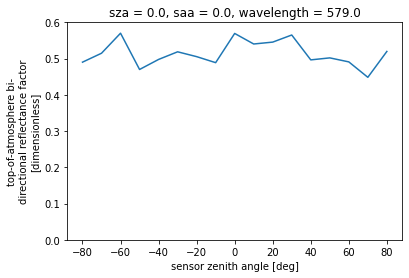

In [4]:
import matplotlib.pyplot as plt
def visualise(results, ylim=None):
    ds = results['toa_pplane']
    pplane_data = ds.brf
    pplane_data.plot()
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

visualise(app.results, ylim=[0., .6])

The results are a little bit too noisy so let us try to get smoother results by increasing the number of samples per pixel (the default value was `spp = 32`):

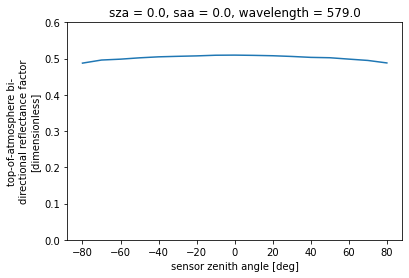

In [5]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 579.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx"
        }
    },
    "measures": [{
        "type": "toa_pplane",
        "spp": 65536
    }]
}
app = OneDimSolverApp.from_dict(config)
app.run()
visualise(app.results, ylim=[0, .6])

This is much better!
We see that the BRF values accumulate around the value 0.5, which corresponds to the lambertian surface reflectance value that we have used.
At high zenith angles, we observe that the scene is less reflective, which makes sense since the atmosphere medium gets more optically thick when viewed from a higher zenith angle.

## Atmospheric scattering and absorption

We can investigate the atmospheric radiative properties of the heterogeneous atmosphere we have just created:

In [6]:
display(app.scene.atmosphere.profile.sigma_t)
display(app.scene.atmosphere.profile.albedo)

Magnitude,[[[8.479833990173695e-06 6.932521879419892e-06 5.612599487244833e-06 4.49526655067791e-06 3.557490078731426e-06 2.7779188171766933e-06 2.029650130306574e-06 1.4824659220387243e-06 1.083056991739645e-06 7.914422373592002e-07 5.761790631234317e-07 4.1856480850875656e-07 3.050064647101309e-07 2.2293131093204119e-07 1.6342688650132554e-07 1.201545826435032e-07 8.805580434551593e-08 6.439475994242342e-08 4.744304097318129e-08 3.520289348562817e-08 2.6298232174851284e-08 1.977374148072493e-08 1.4960483441830373e-08 1.1386300902341515e-08 8.846920088299804e-09 6.900136517984524e-09 5.462176196445046e-09 4.322364142184992e-09 3.4038719089137946e-09 2.6670485478967545e-09 2.078730547200982e-09 1.6112846064443357e-09 1.2417759733873624e-09 9.512476399742642e-10 7.240977349073755e-10 5.475435369391574e-10 4.095163748754477e-10 3.037374832997549e-10 2.2405334997316042e-10 1.643389053772711e-10 1.1983121135202793e-10 8.68438565875953e-11 6.253756575421101e-11 4.433805130805013e-11 3.109124488176538e-11 2.1819014028721977e-11 1.5294325388701697e-11 1.0694259907904718e-11 7.467089317171872e-12 5.214988791184786e-12]]]
Units,1/meter


Magnitude,[[[0.9976855535686093 0.9981214840504461 0.9984788294021868 0.998775613570001 0.9990275628823797 0.9992465387251994 0.9994437999046757 0.9995915037299546 0.9997033914465426 0.9997820659927164 0.999839204666453 0.9998833705210685 0.9999160517479537 0.9999385494519939 0.9999535538320858 0.999967027000646 0.9999747298503128 0.9999819137766341 0.9999887680438398 0.9999895925208804 0.9999921941503829 0.9999947770218978 0.9999948083173142 0.9999948404020091 0.9999999999999999 1.0 1.0 1.0 1.0 0.9999999999999999 1.0000000000000002 1.0 0.9999999999999999 0.9999999999999999 1.0 1.0 1.0 1.0000000000000002 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]]]
Units,dimensionless


There are as many values in the `sigma_t` and `albedo` arrays that they are layers (50 in our example) in the atmosphere.
The first element corresponds to the first layer (the surface layer), the last element corresponds to the last layer (top-of-atmosphere layer).
The extinction coefficient (`sigma_t`) barely reaches $10^{-5}$ m$^{-1}$ at the surface and then decreases by 6 orders of magnitude when moving to the top of atmosphere.
This corresponds to an optically thin participating medium.
The albedo values are very close to 1, which means that the participating medium is almost scattering-only.
Molecular absorption is very weak in the visible range:

In [7]:
display(app.scene.atmosphere.profile.sigma_a)

Magnitude,[[[1.962612151734237e-08 1.3022852921121799e-08 8.53772131729821e-09 5.5039433638790395e-09 3.459435398124479e-09 2.093054253282856e-09 1.1288915959516126e-09 6.055817996222523e-10 3.212439676318325e-10 1.7248217832118695e-10 9.264690463778021e-11 4.881699551544368e-11 2.5604759575227225e-11 1.3699251224509133e-11 7.590552612117783e-12 3.961856975903756e-12 2.225183356640979e-12 1.1646580119080013e-12 5.328781563175633e-13 3.6637337890401957e-13 2.0528004555395943e-13 1.0327781875403034e-13 7.767008285714608e-14 5.874873525861804e-14 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]]
Units,1/meter


Molecular absorption gets stronger in the infrared range:

In [8]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 1281.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx"
        }
    },
    "measures": [{
        "type": "toa_pplane",
        "spp": 65536
    }]
}
app_1281 = OneDimSolverApp.from_dict(config)
display(app_1281.scene.atmosphere.profile.albedo)

Magnitude,[[[0.023037695683030924 0.024038541509991934 0.02620838399022937 0.030367617469671298 0.03790750145598889 0.049619003764194744 0.05764746236790355 0.06874210505266458 0.08312237907236779 0.10260821209372387 0.12742078807168764 0.1509487569080104 0.1801728115191397 0.20286608298021108 0.2176789735148053 0.2322838602264748 0.24849525553244478 0.2565690674058975 0.2262088548651174 0.2185150900498289 0.2021529588253279 0.18156472457228132 0.16517142373805346 0.1599567064246783 0.1611368801352185 0.16206338763657088 0.1725677966988538 0.20394883551309212 0.22527069930770946 0.23885073061204037 0.2703389222706468 0.3251402442700632 0.37798576359080216 0.4243839436502339 0.44811465169548453 0.5358027359979646 0.5504037407253929 0.5849716209581862 0.6487604012307796 0.6462207616254005 0.6940894856957345 0.7260328280355312 0.7926779936109779 0.8044215026363613 0.8081687374415021 0.8080641619049488 0.7841047319466811 1.0 1.0 0.9999999999999999]]]
Units,dimensionless


We can observe that the TOA BRF values are affected by this more absorbing atmosphere:

(0.0, 0.6)

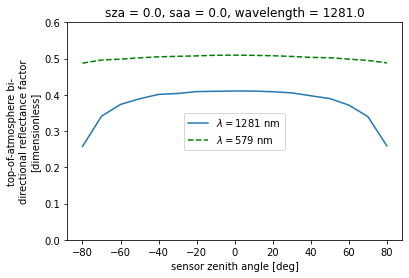

In [9]:
app_1281.run()

plt.figure()
app_1281.results['toa_pplane'].brf.plot()
plt.plot(app.results['toa_pplane'].vza.values, app.results['toa_pplane'].brf.values, linestyle="dashed", color="green")
plt.legend(["$\lambda=1281$ nm", "$\lambda=579$ nm"], loc='center')
plt.ylim([0., 0.6])

Molecular absorption spectra feature so-called "absorption lines": absorption occurs in some specific narrow wavelength values ranges.
Outside of these ranges, there is no absorption.
Let us change the wavelength from $1281$ to $1279$ nm:

In [10]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 1279.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx"
        }
    },
    "measures": [{
        "type": "toa_pplane",
        "spp": 65536
    }]
}
app = OneDimSolverApp.from_dict(config)
display(app.scene.atmosphere.profile.albedo)

Magnitude,[[[1.0 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0 1.0 1.0 1.0 1.0 0.9999999999999999 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0 0.9999999999999999 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0000000000000002 1.0 1.0 1.0 1.0 1.0000000000000002 1.0 1.0 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0 1.0 1.0 1.0 1.0 0.9999999999999999 0.9999999999999999]]]
Units,dimensionless


Molecular scattering is computed using the Rayleigh scattering model.
In this model, the scattering coefficient varies proportionaly to $\lambda^{-4}$ where $\lambda$ is the wavelength.
If we change the wavelength from $580$ to $400$ nm, we observe that the values of the scattering coefficient are larger:

In [11]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 400.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx"
        }
    }
}
app = OneDimSolverApp.from_dict(config)
display(app.scene.atmosphere.profile.sigma_s.to("1/m"))

Magnitude,[[[3.861488383997091e-05 3.158260587050807e-05 2.557854800624654e-05 2.0492553156236165e-05 1.6221597538755742e-05 1.2669645371158981e-05 9.258734407136596e-06 6.763620056800271e-06 4.94190397902107e-06 3.611572346755299e-06 2.6294161945092543e-06 1.910221441474245e-06 1.3920159588969364e-06 1.0174568271897388e-06 7.458902475926185e-07 5.484001965852002e-07 4.0190053861835603e-07 2.9390991850880055e-07 2.165405346191428e-07 1.6067392495367693e-07 1.2003135926176378e-07 9.025227150496562e-08 6.828336722903902e-08 5.196991075401825e-08 4.0379753094297305e-08 3.1494102527013785e-08 2.493085994298906e-08 1.9728447272161344e-08 1.5536198530352704e-08 1.2173136002942764e-08 9.487892401831574e-09 7.3543418541829645e-09 5.667803779850607e-09 4.3417532606315556e-09 3.3049792772561306e-09 2.4991378471131643e-09 1.8691442694125026e-09 1.3863406099427767e-09 1.022640508719117e-09 7.500875052721257e-10 5.469422495498944e-10 3.963790435322726e-10 2.8543849809697565e-10 2.0237093014247375e-10 1.4190890489881292e-10 9.958786996268979e-11 6.980749484457789e-11 4.8811493675416234e-11 3.408184305980541e-11 2.3802639913768124e-11]]]
Units,1/meter


## Set the atmosphere height and number of layers

Next, let's try to customise the heterogeneous atmosphere by changing its height and number of layers.

So far, the heterogeneous atmosphere was defined by the `us76_approx` radiative properties profile without parameters.
The `us76_approx` radiative properties profile takes two parameters:
    
- `height` (default: $100$ km)
- `n_layers`(default: $50$).

Obviously enough, `height` sets the height of the radiative properties profile, therefore of the heterogeneous atmosphere, whereas `n_layers` sets the number of atmospheric layers.

Let us try and use different values:

In [12]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 580.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx",
            "height": 90,
            "height_units": "km",
            "n_layers": 90
        }
    },
    "measures": [{
        "type": "toa_pplane",
        "spp": 16384
    }]
}
app = OneDimSolverApp.from_dict(config)

This creates a $90$ km high heterogeneous atmosphere with 90 atmospheric layers, each $1$ km thick.

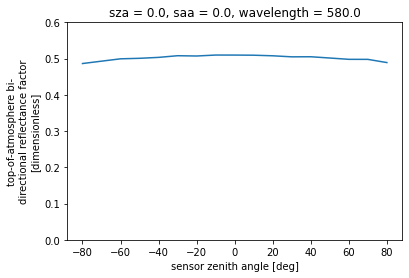

In [13]:
app.run()
visualise(app.results, ylim=([0., 0.6]))

A 20 km high heterogeneous atmosphere with 10 layers each 2 km thick, would be set with:

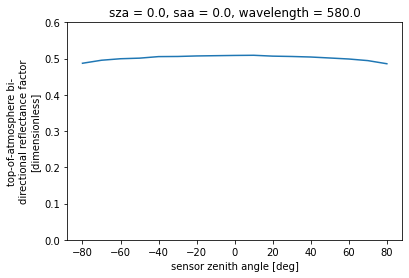

In [14]:
config = {
    "mode": {
        "type": "mono_double",
        "wavelength": 580.
    },
    "atmosphere": {
        "type": "heterogeneous",
        "profile": {
            "type": "us76_approx",
            "height": 20,
            "height_units": "km",
            "n_layers": 10
        }
    },
    "measures": [{
        "type": "toa_pplane",
        "spp": 65536
    }]
}
app = OneDimSolverApp.from_dict(config)
app.run()
visualise(app.results, ylim=([0., 0.6]))